In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

### We can even add in a a stop condition. For this one, we can tell Python to look for a greyed out “Next Page” button. To identify this element, use the element inspector.

In [5]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/999 [00:00<?, ?it/s]

In [6]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,product,date,title,rating,body
0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Reviewed in India 🇮🇳 on 7 November 2022,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,4.0,I was searching a smartphone in 25-30k segment...
1,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Reviewed in India 🇮🇳 on 24 November 2022,best for light use,4.0,overall phone is great but the processor is ki...
2,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Reviewed in India 🇮🇳 on 23 November 2022,After one month used,4.0,"1.No bloatwares, oxygen OS is best2.Display Qu..."
3,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Reviewed in India 🇮🇳 on 2 November 2022,Good one,4.0,"*Battery life is decent, if you're a heavy use..."
4,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Reviewed in India 🇮🇳 on 21 November 2022,Review after using 2+ Months of usage,4.0,Con's1. Getting heat while charging2. Average ...
...,...,...,...,...,...
4995,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",30 July 2022,All nice,5.0,
4996,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",4 July 2022,Battery not good,3.0,Good product
4997,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",29 July 2022,Excellent phone,5.0,Good camera quality
4998,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",25 June 2022,Very very good phone,5.0,I like this phone battery life is very good di...


In [7]:
df.to_csv('file.csv')

In [8]:
# importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import spacy

In [10]:
df.drop(columns=['date'], inplace=True)

In [11]:
df.isnull().sum()

product    0
title      0
rating     0
body       0
dtype: int64

In [12]:
df.rating.value_counts()

5.0    2212
4.0    2081
3.0     597
2.0     106
1.0       4
Name: rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


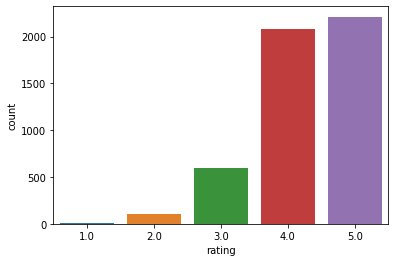

In [13]:
sns.countplot(df.rating)

In [14]:
df.rename(columns={'body':'Review'}, inplace=True)

In [15]:
df.head()

,product,title,rating,Review
0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,4.0,I was searching a smartphone in 25-30k segment...
1,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",best for light use,4.0,overall phone is great but the processor is ki...
2,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",After one month used,4.0,"1.No bloatwares, oxygen OS is best2.Display Qu..."
3,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Good one,4.0,"*Battery life is decent, if you're a heavy use..."
4,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Review after using 2+ Months of usage,4.0,Con's1. Getting heat while charging2. Average ...


In [17]:
review = [x.strip() for x in df.Review] # remove both the leading and the trailing characters
review = [x for x in df.Review if x] # removes empty strings, because they are considered in Python as False
review[0:10]

['I was searching a smartphone in 25-30k segment checked lot of phones but could not find a good phone with on screen FPS and dedicated sim/MC slot suddenly I checked on google that 1+ is also launching the phones with these features and then I watched an unboxing video and decided to buy this phone the brightness of the display and battery should be more good so it will be definitely more awesome but as per performance and brand of 1+ phone is good in 23000 (including cards discount) the antutu is about to 5lac when the antutu of iphone 12 (Rs 42k cost) is 6.25 lac so this deal is not bad, but if you are planing to buy so just check the phone at the showroom or on ytube.',
 'overall phone is great but the processor is kinda gives low performancenot gonna recommend for gaming purpose for light use its the best mobile to pick out',
 '1.No bloatwares, oxygen OS is best2.Display Quality is amazing3.Battery Back Up is not up to mark4. Camera quality is best5. Light weight and slim size6. G

In [18]:
# Joining the list into one string/text
text = ' '.join(review)
text

'I was searching a smartphone in 25-30k segment checked lot of phones but could not find a good phone with on screen FPS and dedicated sim/MC slot suddenly I checked on google that 1+ is also launching the phones with these features and then I watched an unboxing video and decided to buy this phone the brightness of the display and battery should be more good so it will be definitely more awesome but as per performance and brand of 1+ phone is good in 23000 (including cards discount) the antutu is about to 5lac when the antutu of iphone 12 (Rs 42k cost) is 6.25 lac so this deal is not bad, but if you are planing to buy so just check the phone at the showroom or on ytube. overall phone is great but the processor is kinda gives low performancenot gonna recommend for gaming purpose for light use its the best mobile to pick out 1.No bloatwares, oxygen OS is best2.Display Quality is amazing3.Battery Back Up is not up to mark4. Camera quality is best5. Light weight and slim size6. Good deal 

In [20]:
import string
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'I was searching a smartphone in 2530k segment checked lot of phones but could not find a good phone with on screen FPS and dedicated simMC slot suddenly I checked on google that 1 is also launching the phones with these features and then I watched an unboxing video and decided to buy this phone the brightness of the display and battery should be more good so it will be definitely more awesome but as per performance and brand of 1 phone is good in 23000 including cards discount the antutu is about to 5lac when the antutu of iphone 12 Rs 42k cost is 625 lac so this deal is not bad but if you are planing to buy so just check the phone at the showroom or on ytube overall phone is great but the processor is kinda gives low performancenot gonna recommend for gaming purpose for light use its the best mobile to pick out 1No bloatwares oxygen OS is best2Display Quality is amazing3Battery Back Up is not up to mark4 Camera quality is best5 Light weight and slim size6 Good deal if you got under 2

In [ ]:
nltk.download('all')

In [23]:
#Tokenization
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I', 'was', 'searching', 'a', 'smartphone', 'in', '2530k', 'segment', 'checked', 'lot', 'of', 'phones', 'but', 'could', 'not', 'find', 'a', 'good', 'phone', 'with', 'on', 'screen', 'FPS', 'and', 'dedicated', 'simMC', 'slot', 'suddenly', 'I', 'checked', 'on', 'google', 'that', '1', 'is', 'also', 'launching', 'the', 'phones', 'with', 'these', 'features', 'and', 'then', 'I', 'watched', 'an', 'unboxing', 'video', 'and']


In [24]:
len(text_tokens)

74392

In [25]:
#Remove stopwords
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['I', 'searching', 'smartphone', '2530k', 'segment', 'checked', 'lot', 'phones', 'could', 'find', 'good', 'phone', 'screen', 'FPS', 'dedicated', 'simMC', 'slot', 'suddenly', 'I', 'checked', 'google', '1', 'also', 'launching', 'phones', 'features', 'I', 'watched', 'unboxing', 'video', 'decided', 'buy', 'phone', 'brightness', 'display', 'battery', 'good', 'definitely', 'awesome', 'per']


In [26]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['i', 'searching', 'smartphone', '2530k', 'segment', 'checked', 'lot', 'phones', 'could', 'find', 'good', 'phone', 'screen', 'fps', 'dedicated', 'simmc', 'slot', 'suddenly', 'i', 'checked', 'google', '1', 'also', 'launching', 'phones']


In [27]:
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['i', 'search', 'smartphon', '2530k', 'segment', 'check', 'lot', 'phone', 'could', 'find', 'good', 'phone', 'screen', 'fp', 'dedic', 'simmc', 'slot', 'suddenli', 'i', 'check', 'googl', '1', 'also', 'launch', 'phone', 'featur', 'i', 'watch', 'unbox', 'video', 'decid', 'buy', 'phone', 'bright', 'display', 'batteri', 'good', 'definit', 'awesom', 'per']


In [30]:
nlp = spacy.load('en_core_web_sm')

In [31]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

I searching smartphone 2530k segment checked lot phones could find good phone screen FPS dedicated simMC slot suddenly I checked google 1 also launching phones features I watched unboxing video decided buy phone brightness display battery good definitely awesome per


In [32]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['I', 'search', 'smartphone', '2530k', 'segment', 'check', 'lot', 'phone', 'could', 'find', 'good', 'phone', 'screen', 'FPS', 'dedicated', 'simmc', 'slot', 'suddenly', 'I', 'check', 'google', '1', 'also', 'launch', 'phone']


### Feature Extraction

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [47]:
x = vectorizer.fit_transform(lemmas)

In [34]:
print(vectorizer.vocabulary_)

{'search': 4942, 'smartphone': 5144, '2530k': 201, 'segment': 4965, 'check': 1459, 'lot': 3393, 'phone': 4184, 'could': 1655, 'find': 2328, 'good': 2550, 'screen': 4922, 'fps': 2407, 'dedicated': 1766, 'simmc': 5087, 'slot': 5124, 'suddenly': 5343, 'google': 2667, 'also': 658, 'launch': 3251, 'feature': 2276, 'watch': 5900, 'unbox': 5678, 'video': 5843, 'decide': 1763, 'buy': 1249, 'brightness': 1195, 'display': 1904, 'battery': 1003, 'definitely': 1779, 'awesome': 878, 'per': 4135, 'performance': 4147, 'brand': 1181, '23000': 185, 'include': 2954, 'card': 1335, 'discount': 1896, 'antutu': 724, '5lac': 400, 'iphone': 3027, '12': 65, '42k': 291, 'cost': 1649, '625': 420, 'lac': 3210, 'deal': 1754, 'bad': 929, 'planing': 4285, 'showroom': 5067, 'ytube': 6090, 'overall': 4064, 'great': 2683, 'processor': 4441, 'kinda': 3187, 'give': 2524, 'low': 3410, 'performancenot': 4158, 'go': 2546, 'to': 5574, 'recommend': 4690, 'gaming': 2476, 'purpose': 4529, 'light': 3315, 'use': 5762, 'mobile': 3

In [35]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10th', '10totally', '10w', '11', '1110no', '11111battery', '1112', '112', '113', '119degree', '11front', '11it', '11loud', '11most', '11should', '12', '120', '120gw', '120hz', '120hzno', '1213k', '1214', '1215', '1215hrs', '122', '128', '128gb1', '128gbprice18000', '128gig', '12bands', '12bettery', '12bit', '12k', '12mono', '13', '130822', '1317k', '13k', '13kcompare', '14', '1415', '144', '14500', '14konly', '15', '15000', '1500020000', '15100', '1519', '1520']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
print(X.toarray().shape)

(50858, 6200)


## TFIdf Vectorizer

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(df['Review'])
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '100', '11', '12', '15', '20', '20k', '25k', '30', '5g', '65w', 'about', 'after', 'after using', 'all', 'all good', 'almost', 'also', 'also good', 'always', 'am', 'amazing', 'amazon', 'amoled', 'amoled display', 'an', 'and', 'and battery', 'and camera', 'and camera quality', 'and it', 'and the', 'android', 'any', 'app', 'apps', 'are', 'are good', 'are not', 'as', 'as expected', 'at', 'at this', 'at this price', 'available', 'average', 'awesome', 'back', 'back up', 'backup', 'backup is', 'bad', 'battery', 'battery backup', 'battery backup is', 'battery is', 'battery life', 'battery life is', 'be', 'be loaded', 'because', 'been', 'best', 'best phone', 'better', 'better than', 'bit', 'bought', 'brand', 'budget', 'budget phone', 'but', 'but battery', 'but camera', 'but it', 'but not', 'but the', 'buy', 'buy this', 'buying', 'by', 'call', 'camera', 'camera and', 'camera is', 'camera is good', 'camera is not', 'camera quality', 'camera quality is', 'can', 'can be', 'card', 'ce', 'char

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

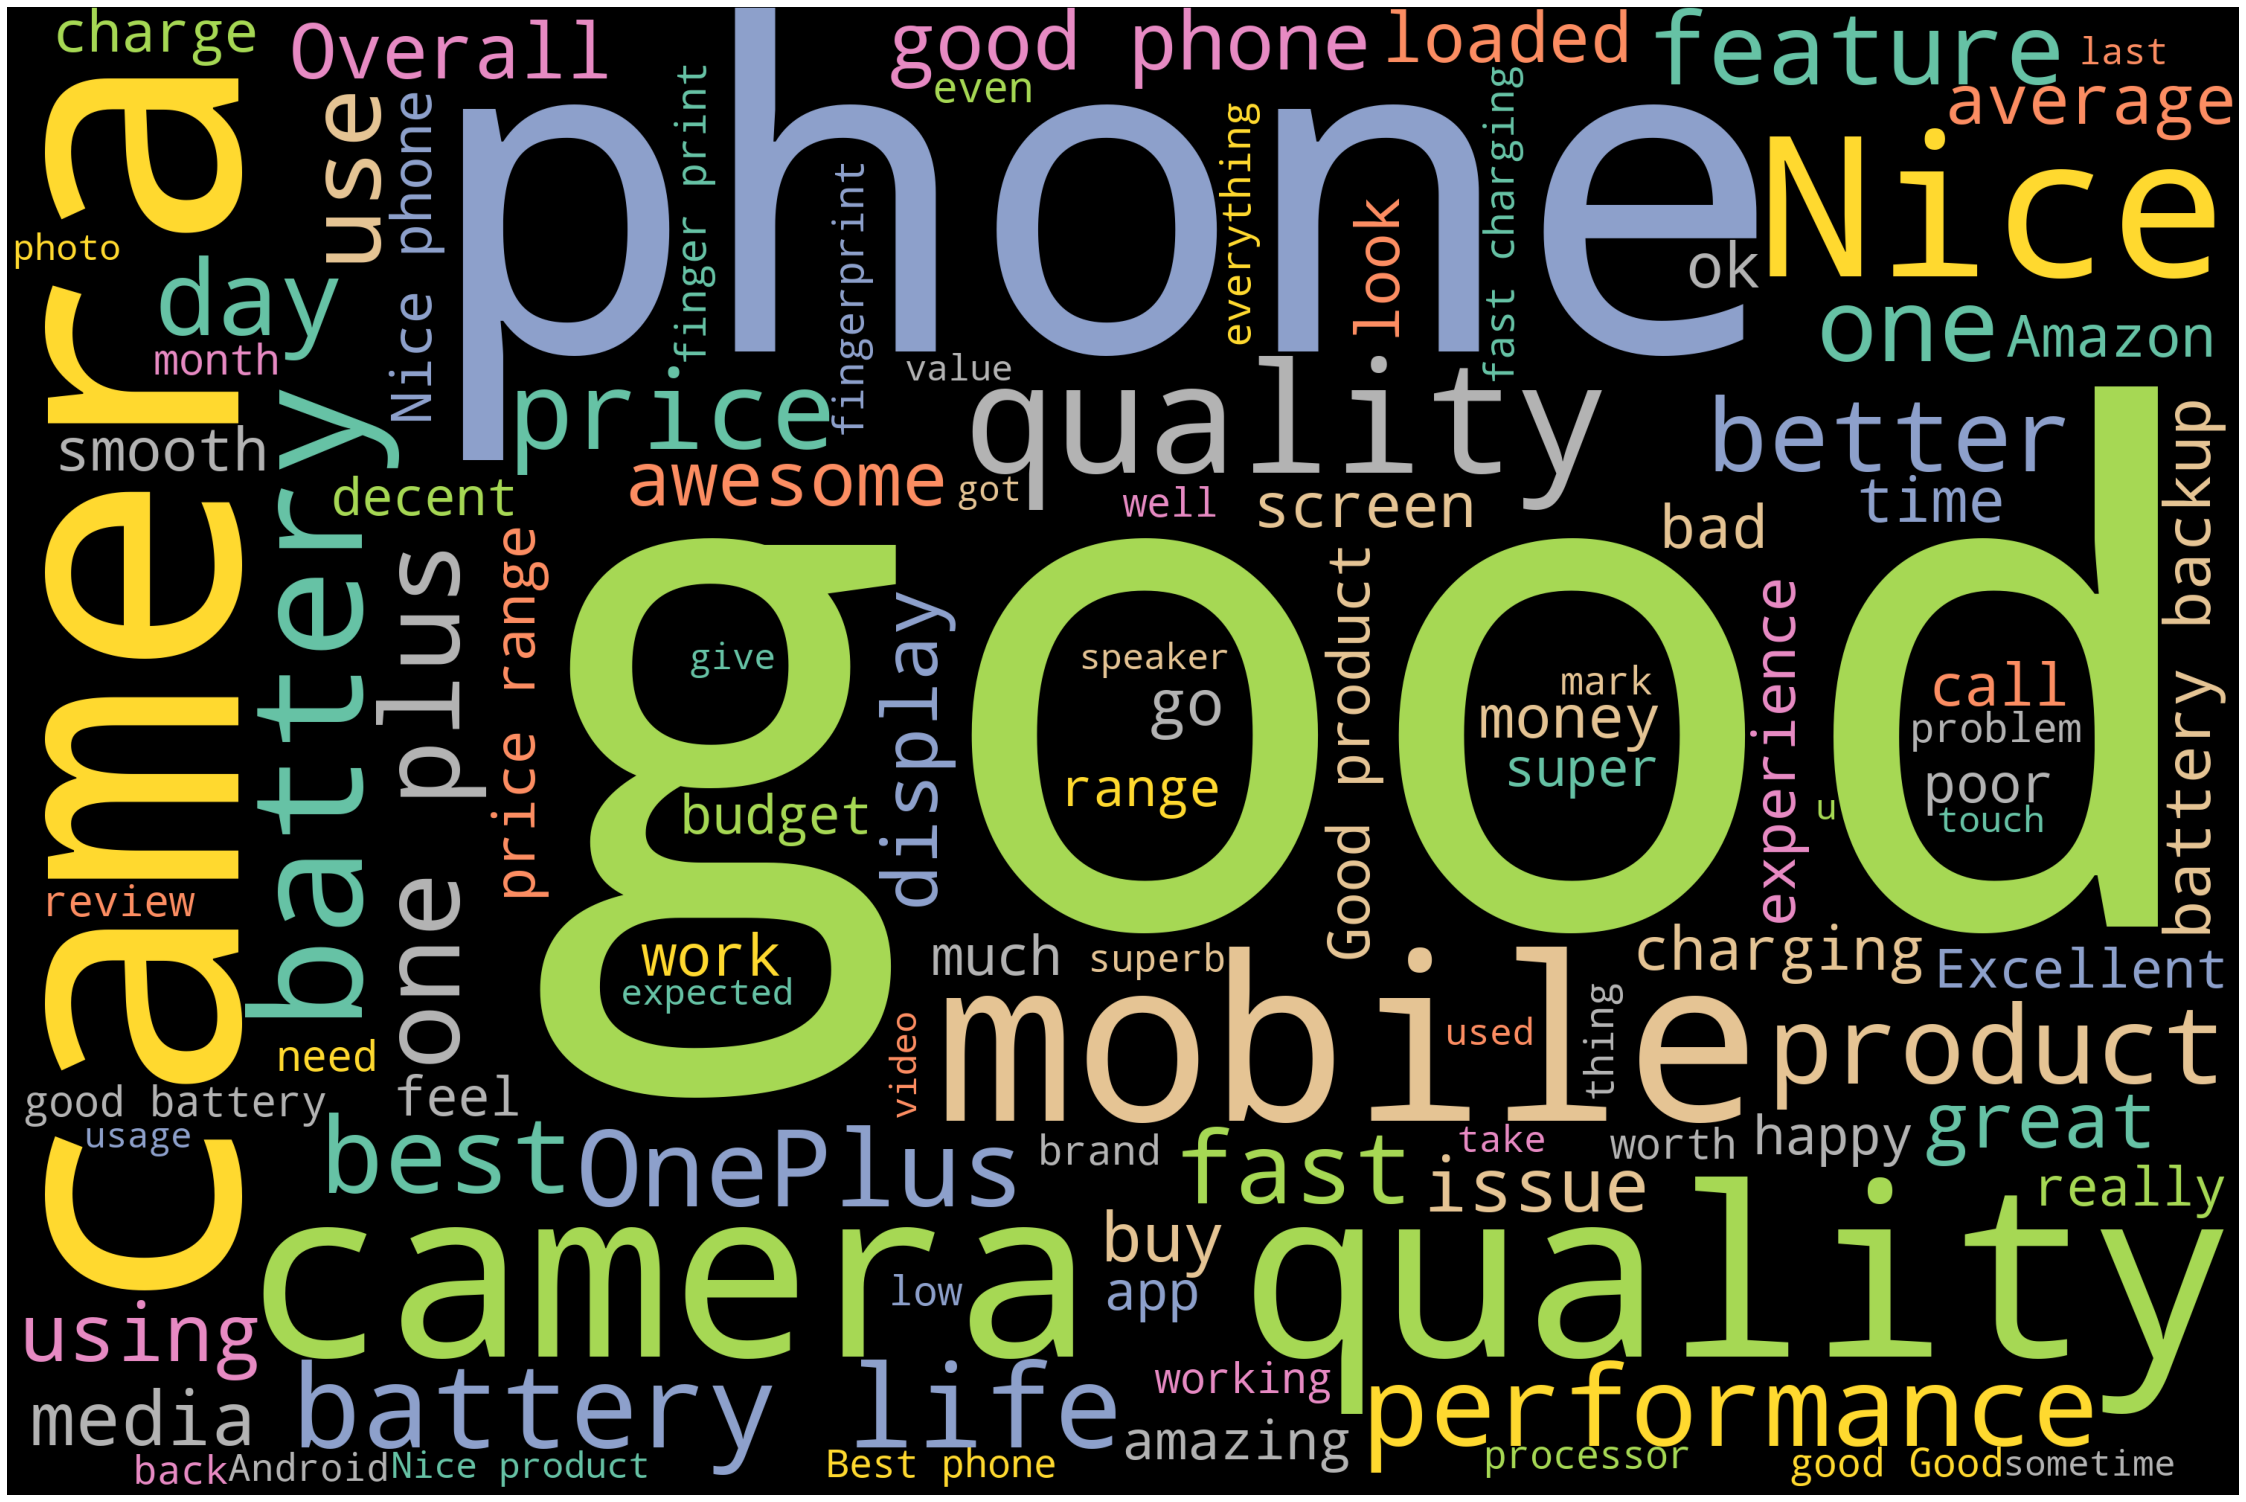

In [41]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [51]:
df['word_count'] = df['Review'].str.split().apply(len)
df['word_count']

0       131
1        27
2        34
3       111
4        39
       ... 
4995      0
4996      2
4997      3
4998     24
4999      2
Name: word_count, Length: 5000, dtype: int64

In [53]:
df.sort_values(by='rating').tail(10)

,product,title,rating,Review,word_count
3059,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Nice phone,5.0,"Easy to use. Good camera, touch is fine. Fast ...",10
3060,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Not good,5.0,Not good,2
1007,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Very Good phone,5.0,Good phone,2
3064,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Owesome Product,5.0,Good product and camera quality is owesome,7
3065,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Good phone with low price but features are all...,5.0,Good phone with low budget.,5
1001,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Not likly online shopping any electronics items,5.0,Not likly online shopping any electronics items,7
3069,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Budget phone under 20k,5.0,If you are looking for under 20k with good fea...,17
1000,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Not up to the mark,5.0,Plus:Budgetary phoneoptions are moreBattery ba...,12
3058,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Good product,5.0,"Good product, but camera quality degrades with...",8
4999,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Nice phone,5.0,Nice phone,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


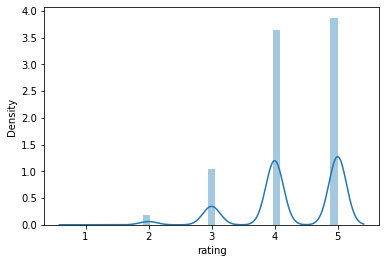

In [55]:
sns.distplot(df['rating'])

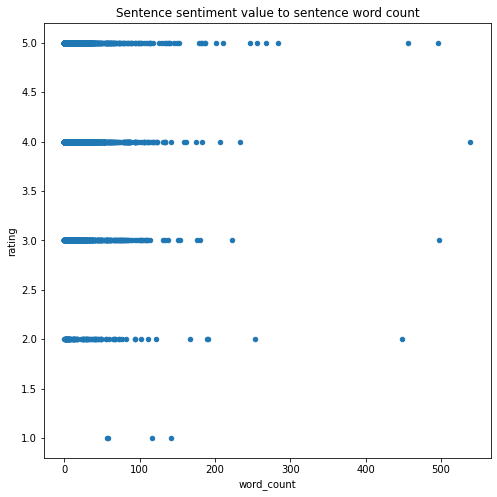

In [58]:
df.plot.scatter(x='word_count', y='rating', figsize=(8,8), title='Sentence sentiment value to sentence word count')